# Data Analyse : Data Science Job Salaries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#récupérer les dataset
data=pd.read_csv('/Users/an/Downloads/ds_salaries.csv')

In [140]:
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [141]:
new_data=data.loc[:,["work_year","experience_level",
                     "job_title","salary",
                     "salary_in_usd",
                     "remote_ratio",
                     "company_location"]];

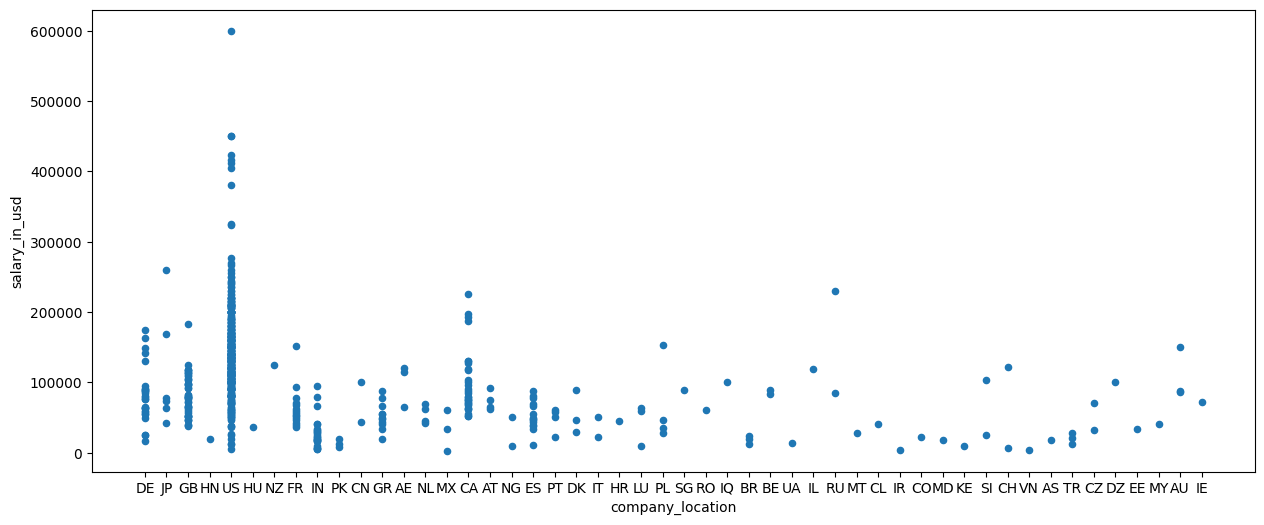

In [116]:
# la relation entre pays et salary
g=data.plot.scatter('company_location','salary_in_usd')
g.figure.set_size_inches(15,6);

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

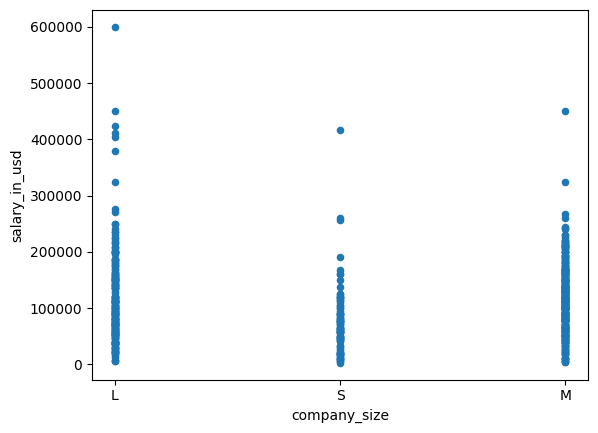

In [138]:
data.plot.scatter('company_size','salary_in_usd')

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

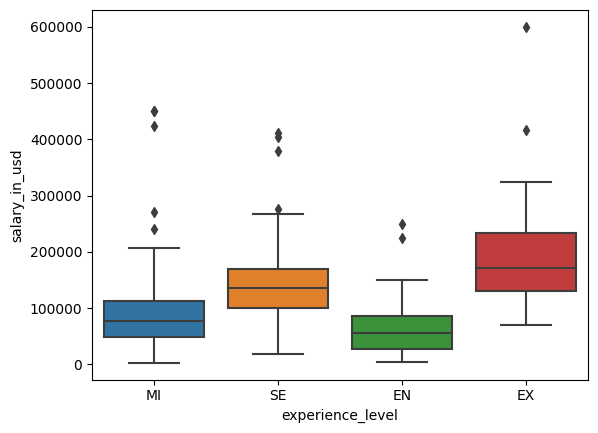

In [97]:
# La relation entre le salaire et l'année de travail
sb.boxplot(x='experience_level',y='salary_in_usd',data=data)

In [92]:
data.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

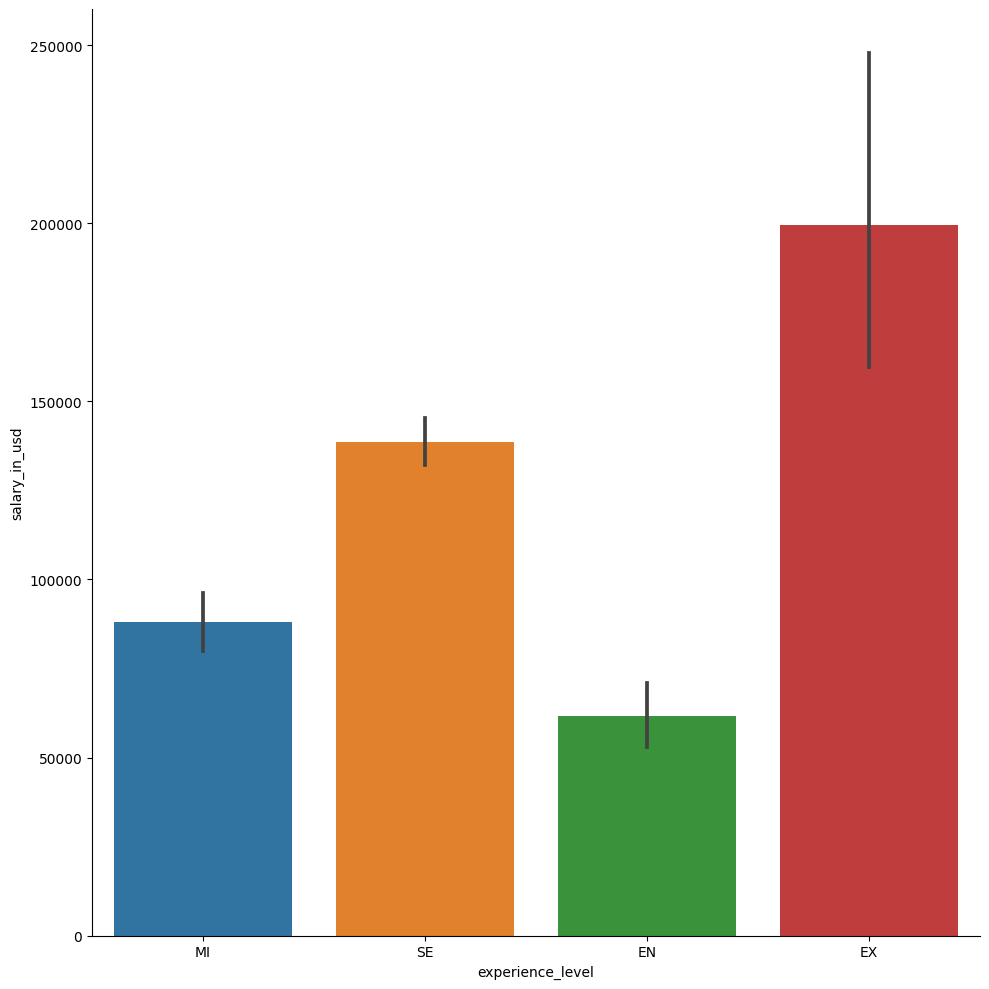

In [32]:
#La relation entre le salaire et l'experience_level
sb.catplot(y="salary_in_usd",x="experience_level",data=data,kind='bar',height=10)

In [99]:
a=data.loc[:,"job_title"].value_counts();a

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

(-1.1009157103201945,
 1.1175355947998253,
 -1.1138851397537903,
 1.1045661653662295)

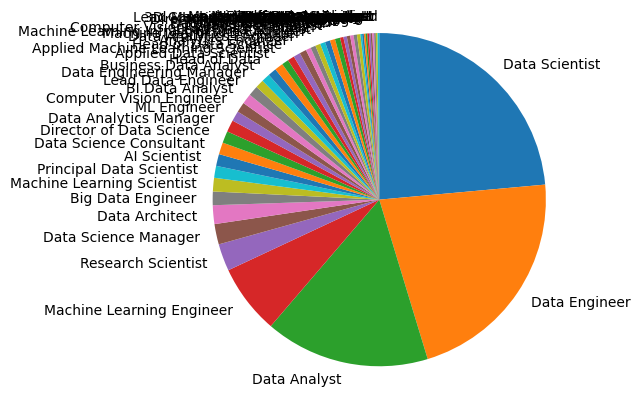

In [136]:
plt.pie(a, labels = a.index, startangle = 90,
        counterclock = False);
plt.axis('square')

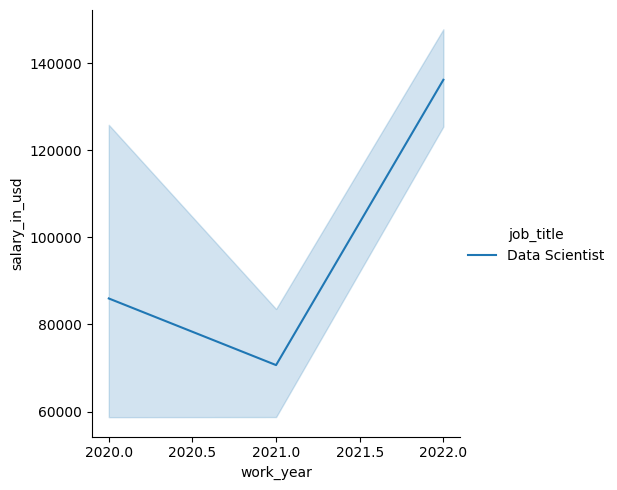

In [135]:
# regrouper le job de Data Scientist
tmp=data.loc[data.job_title=="Data Scientist"]
# Le développement de Data Scientist 
#sb.lineplot(x="work_year",y="salary_in_usd",data=tmp);
sb.relplot(data=tmp, x="work_year", y="salary_in_usd", hue="job_title", kind="line")

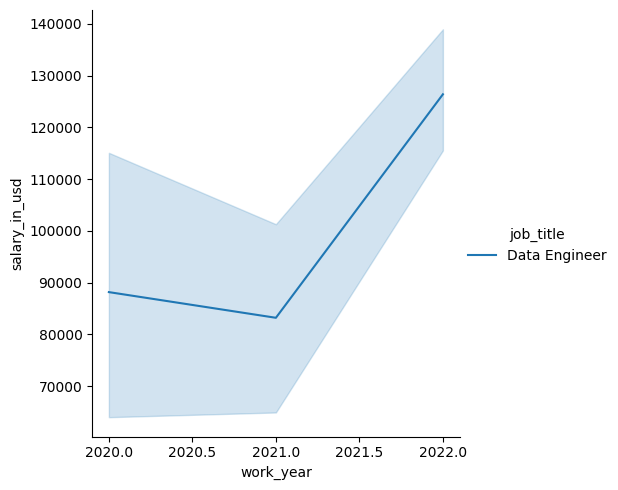

In [133]:
tmp1=data.loc[data.job_title=="Data Engineer"]
sb.relplot(data=tmp1, x="work_year", y="salary_in_usd", hue="job_title", kind="line")

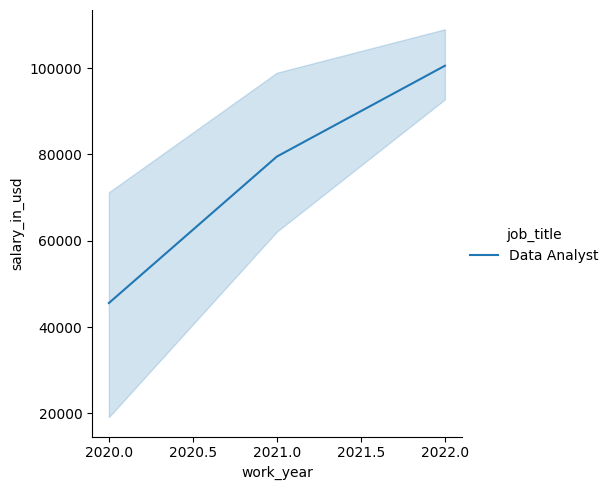

In [134]:
tmp2=data.loc[data.job_title=="Data Analyst"]
sb.relplot(data=tmp2, x="work_year", y="salary_in_usd", hue="job_title", kind="line")

<AxesSubplot:>

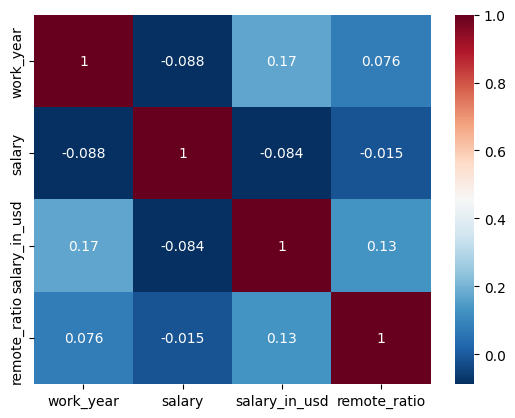

In [139]:
corr = new_data.corr()
sb.heatmap(corr,annot=True,cmap="RdBu_r")